# Objective：to develop an accurate model that can be used to predict sales on the basis of 3 medias budgets.

# Import Dependencies


In [712]:
import pandas as pd

In [713]:
import numpy as np

In [714]:
import matplotlib.pyplot as plt

In [715]:
from sklearn.linear_model import LinearRegression

In [716]:
from sklearn.metrics import mean_squared_error

**Load Dataset**

- Dataset is provided by my client to help me anaylze sales of product in 200 different market and advertising budgets for the product in three different media:TV, Radio and Newspaper.

**Dataset Descripition**
- TV: Advertising spend in thousands (K) of Canadian Dollars ($)

- Radio: Advertising spend in thousands (K) of Canadian Dollars ($)

- Newspaper: Advertising spend in thousands (K) of Canadian Dollars ($)

- Sales: Sales volume in thousands of units

In [717]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


- I observed that Unamed,Unnamed:0 serves as a row of indexis an extra feature, we don't need it.This need to comfirm with our client and we both agree that Unnamed:0 should be dropped.

- So It's for my futher review , and also for another people who wants to read & understand your code

In [718]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [719]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


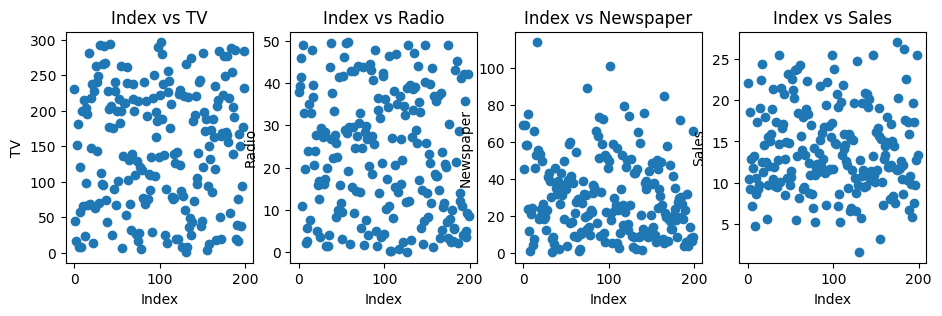

In [720]:
plt.figure(figsize=(14,3))

for i, feature in enumerate (df.columns):
    plt.subplot(1,5,(i+1))
    plt.scatter(df.index,df[feature])
    plt.xlabel('Index')
    plt.ylabel(f'{feature}')
    plt.title(f'Index vs {feature}')

plt.show()

TV is the most average sales.Newspaper might has potential outliers but we need to prove.Sales mean quantity of sales.

# Stastitical Analysis

In [721]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


- Mean:average level of data
- Median:median level of data, which devide data to two eqaul part
- Mode:the most frequency number in the data
- Mean,median and mode are descriptive statistic--central tendency.

- The max of Newspaper is likely to be the potential of outliers and  we need to prove that.

In [722]:

column_values = df['TV'].tolist()


min_value = column_values[0]
for value in column_values:
    if value < min_value:
        min_value = value


max_value = column_values[0]
for value in column_values:
    if value > max_value:
        max_value = value

sum_value = 0
count = 0
for value in column_values:
    sum_value += value
    count += 1
mean_value = sum_value / count

print("Min:", min_value)
print("Max:", max_value)
print("Mean:", mean_value)



Min: 0.7
Max: 296.4
Mean: 147.0425


Calculation in hand is the same result as calculation by computers.

In [723]:
column_value=df['Radio'].tolist()

min_value=column_value[0]
for value in column_value:
    if value < min_value:
        min_value= value

max_value=column_value[0]
for value in column_value:
    if value > max_value:
        max_value=value

total=0
count=0
for value in column_value:
    total=value 
    count=1
mean_value=total/count 
        
print("Min:",min_value)
print("Max:",max_value)
print("Mean:",mean_value)

Min: 0.0
Max: 49.6
Mean: 8.6


Calculation of min and max in hand is the same result as calculation by computers.However, the result of mean is different.

In [724]:
column_value=df['Newspaper'].tolist()

min_value=column_value[0]
for value in column_value:
    if value < min_value:
        min_value=value

max_value=column_value[0]
for value in column_value:
    if value > max_value:
        max_value=value

total=0
count=0
for value in column_value:
    total=value
    count=1
mean_value=total/count

print("Min:",min_value)
print("Max:",max_value)
print("Mean:",mean_value)

Min: 0.3
Max: 114.0
Mean: 8.7


The min and max of Calculation in hands is the same result as in computer.But the result of mean is difference.

In [726]:
column_value=df['Sales'].tolist()

min_value=column_value[0]
for value in column_value:
    if value < min_value:
        min_value=value

max_value=column_value[0]
for value in column_value:
    if value > max_value:
        max_value=value

total=0
count=0
for value in column_value:
    total=value
    count=1
mean_value=total/count

print("Min:",min_value)
print("Max:",max_value)
print("Mean:",mean_value)

Min: 1.6
Max: 27.0
Mean: 13.4


The min and max of Calculation in hands is the same result as in computer.But the result of mean is difference.

# Histogram

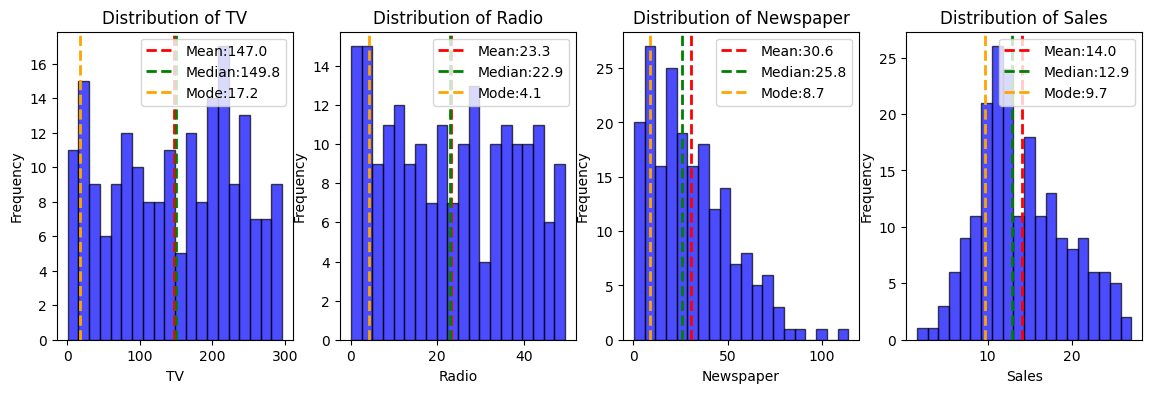

In [686]:

plt.figure(figsize=(14,4))

for i, feature in enumerate(df.columns):
    plt.subplot(1,4,(i+1))
    plt.hist(df[feature],bins=20,color="blue",edgecolor="black",alpha=0.7)
    mean_feature=df[feature].mean()
    median_feature=df[feature].median()
    mode_feature=df[feature].mode()[0]

    plt.axvline(mean_feature,color='red',linestyle='dashed',linewidth=2,label=f'Mean:{mean_feature:.1f}')
    plt.axvline(median_feature,color='green',linestyle='dashed',linewidth=2,label=f'Median:{median_feature:.1f}')
    plt.axvline(mode_feature,color='orange',linestyle='dashed',linewidth=2,label=f'Mode:{mode_feature}') 
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.legend()
    
plt.show()

**Histogram Descripition**: 
- TV: The mean and median closely aligned. The mode is slightly lower than both.I observe that they spend lots of money in TV.

- Radio: The mean, median, and mode are relatively close, indicating minimal skewness.

- Newspaper: The mean is  higher than the median and mode, indicating the presence of higher outliers.

- Sales:  Mean is greater than the median, and the mode is slightly less than both.



# IQR & Denoise

- Steps of IQR

IQR=Q3-Q1


Lower Bound=Q1-1.5*IQR

Upper Bound=Q3+1.5*IQR

- Denoise& Outliers

Lower Bound (Outlier Threshold): -142.30 
Upper Bound (Outlier Threshold): 435.50 
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
data
Lower Bound (Outlier Threshold): -29.85 
Upper Bound (Outlier Threshold): 76.35 
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
data
Lower Bound (Outlier Threshold): -35.78 
Upper Bound (Outlier Threshold): 93.62 
        TV  Radio  Newspaper  Sales
16    67.8   36.6      114.0   12.5
101  296.4   36.3      100.9   23.8
data
Lower Bound (Outlier Threshold): -0.16 
Upper Bound (Outlier Threshold): 27.94 
Empty DataFrame
Columns: [TV, Radio, Newspaper, Sales]
Index: []
data


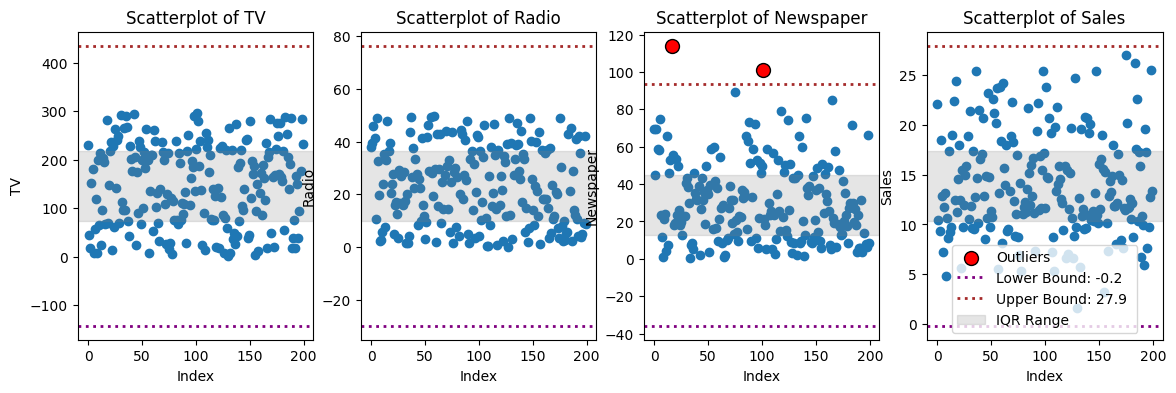

In [687]:
plt.figure(figsize=(14,4))

for i, feature in enumerate (df.columns):
    plt.subplot(1,4,(i+1))
    plt.scatter(df.index,df[feature])
    plt.xlabel("Index")
    plt.ylabel(f'{feature}')
    plt.title(f"Scatterplot of {feature}")
    Q1 = df[feature].quantile(0.25)
    Q2 = df[feature].median()  # Equivalent to quantile(0.50)
    Q3 = df[feature].quantile(0.75)


    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

    plt.scatter(outliers.index, outliers[feature], color='red', label='Outliers', edgecolors='black', s=100)
    
    
    plt.axhline(lower_bound, color='purple', linestyle='dotted', linewidth=2, label=f'Lower Bound: {lower_bound:.1f} ')
    plt.axhline(upper_bound, color='brown', linestyle='dotted', linewidth=2, label=f'Upper Bound: {upper_bound:.1f} ')
    plt.axhspan(Q1, Q3, color='gray', alpha=0.2, label="IQR Range")

    print(f"Lower Bound (Outlier Threshold): {lower_bound:.2f} ")
    print(f"Upper Bound (Outlier Threshold): {upper_bound:.2f} ")
    print(outliers)
    print("data")



plt.legend()

plt.show()

According to the Data virtualization of scatterplot, I observe that Newspaper has a few outliers that more than upper bound, so it should be dropped.

In [688]:
df[df["Newspaper"]>93.6]


,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [689]:
df=df[df['Newspaper']<=93.6]

In [690]:
len(df)

198

- The dataset was reduced from 200 rows to 198 rows after removing outliers based on the `Newspaper` column.

# Dispersion


Dispersion  is consist of various and standard deviation.

Larger variance menas data points deviate more from mean and have greate spread.

High STD mean more decentralized.

I calculated in hand by using the formla of Varience and STD.

- Variance 

In [645]:
column_value=df['TV'].tolist()
sum_value = 0
count = 0
for value in column_value:
    sum_value += value
    count += 1
mean_value = sum_value / count

sum=0
for x in column_value:
    y=x-mean_value
    sum=sum+y**2
    
z=sum/(count)
print(z)






7263.672541832467


- Standard Division

In [646]:
column_value=df['TV'].tolist()
sum_value = 0
count = 0
for value in column_value:
    sum_value += value
    count += 1
mean_value = sum_value / count

sum=0
for x in column_value:
    y=x-mean_value
    sum=sum+y**2
    
z=sum/(count-1)
import math
num = z
result = math.sqrt(z)
print(result) 



85.44322077294936


# Correlation

In Correlation, I can observe the linear or non_linear relationship for each feature.

We should analysis TV.corr(Sales)

Correlation between TV and Sales: 0.78


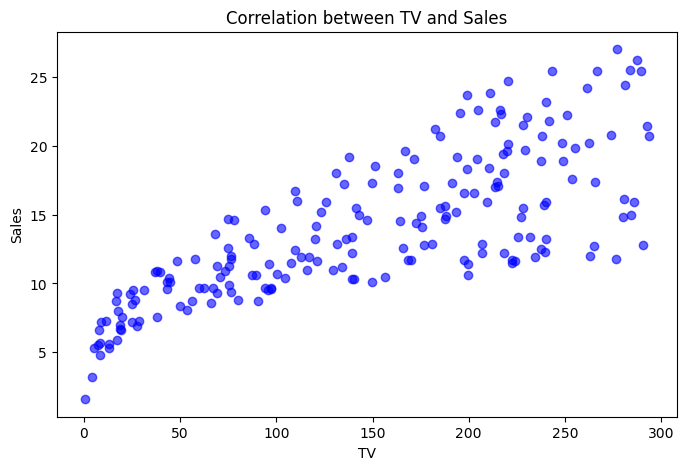

In [647]:
# Correlation Analysis
corr_TV_Sales = df["TV"].corr(df["Sales"])


print(f"Correlation between TV and Sales: {corr_TV_Sales:.2f}")



plt.figure(figsize=(8, 5))
plt.scatter(df["TV"],df["Sales"], color="blue", alpha=0.6)
plt.title("Correlation between TV and Sales")
plt.xlabel("TV")
plt.ylabel("Sales")





plt.show()

- This graph shows that TV and Sales are strong linear relationship.

Correlation between Radio and Sales: 0.58


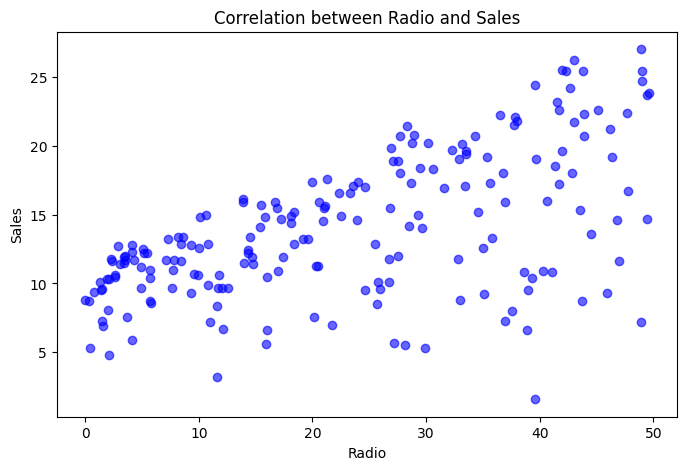

In [648]:
corr_TV_Sales = df["Radio"].corr(df["Sales"])


print(f"Correlation between Radio and Sales: {corr_TV_Sales:.2f}")



plt.figure(figsize=(8, 5))
plt.scatter(df["Radio"],df["Sales"], color="blue", alpha=0.6)
plt.title("Correlation between Radio and Sales")
plt.xlabel("Radio")
plt.ylabel("Sales")





plt.show()

- According to the data, Radio and Sales is not very linear,and more seperated.

Correlation between Newspaper and Sales: 0.22


Text(0, 0.5, 'Sales')

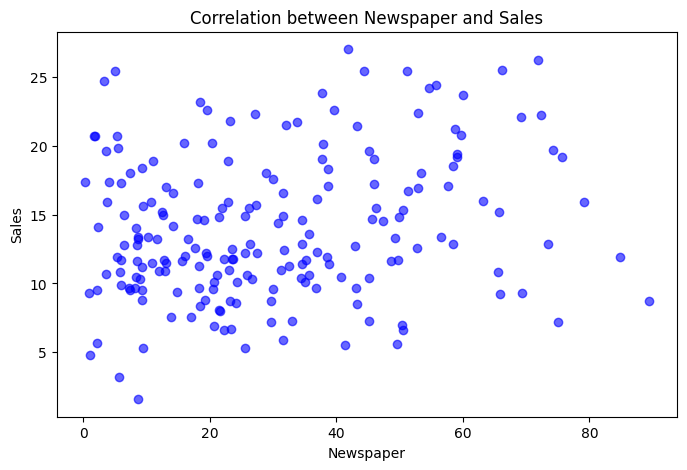

In [649]:
corr_Newspaper_Sales = df["Newspaper"].corr(df["Sales"])


print(f"Correlation between Newspaper and Sales: {corr_Newspaper_Sales:.2f}")



plt.figure(figsize=(8, 5))
plt.scatter(df["Newspaper"],df["Sales"], color="blue", alpha=0.6)
plt.title("Correlation between Newspaper and Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")

- This graph shows that Radio and Newspaper not very linear as TV and Sales.

In [650]:
tv_corr=df['TV'].corr(df['Sales'])
tv_corr

np.float64(0.7791208573985774)

In [651]:
tv_corr=df['Radio'].corr(df['Sales'])
tv_corr

np.float64(0.5767476834229015)

In [652]:
tv_corr=df['Newspaper'].corr(df['Sales'])
tv_corr

np.float64(0.21955467558031128)

- TV is the most fact that affect the sales

# TV Analysis

**Linear Regression Model**

- Use Hand

In [653]:
x=df['TV']
y=df['Sales']
x_mean=x.mean()
y_mean=y.mean()



In [691]:
df['x_diff']=df['TV']-x_mean
df['y_diff']=df['Sales']-y_mean
df['mlt']=df['x_diff']*df['y_diff']
df['x_diff_square']=df['x_diff']*df['x_diff']

<ipython-input-691-7f91bcb70996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff']=df['TV']-x_mean
<ipython-input-691-7f91bcb70996>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_diff']=df['Sales']-y_mean
<ipython-input-691-7f91bcb70996>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [692]:
B1=(df['mlt'].sum())/(df['x_diff_square'].sum())
B0=y_mean-B1*x_mean
print(f'Calculated B1:{B1}')
print(f'Calculated BO:{B0}')


Calculated B1:0.047381029380386394
Calculated BO:7.030561456400218


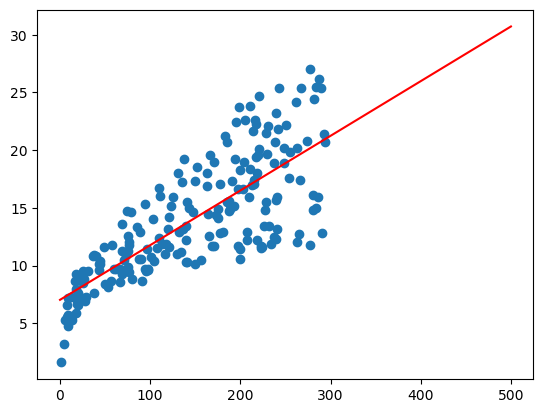

In [693]:
potential_spend=np.linspace(0,500,100)
predicted_sales=0.047381029380386394*potential_spend+7.030561456400218
plt.scatter(x='TV',y='Sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')
plt.show()

- Use numpy

In [694]:
x=df['TV']
y=df['Sales']



B1,B0=np.polyfit(x,y,deg=1)

print(f'Calculated B1 using NumPy:{B1}')
print(f'Calculated B0 using NumPy:{B0}')

Calculated B1 using NumPy:0.04738102938038645
Calculated B0 using NumPy:7.030561456400215


- Use sklearn

In [695]:
x=df[['TV']]
y=df['Sales'].values

model=LinearRegression()
model.fit(x,y)

B1_sklearn=model.coef_[0]
B0_sklearn=model.intercept_

print(f'Calculated B1 using Scikit_Learn: {B1_sklearn:.4f}')
print(f'Calculated B0 using Scikit_Learn:{B0_sklearn:.4f}')

Calculated B1 using Scikit_Learn: 0.0474
Calculated B0 using Scikit_Learn:7.0306


**Predicted the sale when TV Spend is 170**

In [696]:
spend=170
Predicted_value=0.04738102938038645*spend+7.030561456400215
print(Predicted_value)

15.08533645106591


# RSE

-The formula of RSE
RSE=1-RSS/TSS

In [697]:
x=df[['TV']]
y=df['Sales'].values
y_pred=model.predict(x)
mse=mean_squared_error(y,y_pred)

n=len(df['TV'])
RSE=np.sqrt(mse*(n/(n-2)))

print(f'Residual Standard Error(RSE) using Scikit_Learn:{RSE:.4f}')


Residual Standard Error(RSE) using Scikit_Learn:3.2656


- 3.2656 means the actual sales in the market deviate from the true regression line by 3265 units on average.


- If coefficient(B0&B1) are accurate, the prediction of sales on the basis of TV advertising would be off 3265 units.

- Whether or not 3455 units in an acceptable prediction error depends on the problem content.

- The average value of sales is around 14,000 units and so the percentage error is 3265/14000=23%.

# Standard Error

*B0*

In [698]:
x=df['TV']
x_mean=x.mean()
print(x_mean)

146.68838383838386


In [699]:
x=df['TV']
x_mean=x.mean()


x_mean_square=x_mean*x_mean

df['x_diff']=(x-x_mean)**2
x_sum_diff =df['x_diff'].sum()

n==198, s==3.2656
B0=s*(np.sqrt((x_mean_square)/(x_sum_diff)+ 1/n))

print(f'SE_B0:{B0}')





<ipython-input-699-8122bab43205>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff']=(x-x_mean)**2


SE_B0:0.4619621234907892


*B1*

In [663]:
x=df['TV']
x_mean=x.mean()

df['x_diff']=(x-x_mean)**2
x_sum_diff =df['x_diff'].sum()
x_square_root_diff=np.sqrt(x_sum_diff)

B1=3.2656/(x_square_root_diff)

print(f'SE_B1:{B1}')

<ipython-input-663-cc27430370cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_diff']=(x-x_mean)**2


SE_B1:0.0027230289815359746


# Confidence Interval

*New Range*

In [664]:
B0=7.030561456400215


SE_B0=0.4619621234907892


x1=B0+2*SE_B0
x2=B0-2*SE_B0
print(f'Max_B0 is {x1},Min_B0 is {x2}')

Max_B0 is 7.954485703381794,Min_B0 is 6.106637209418636


- So the range for B0 [6.106637209418636,7.954485703381794]

In [665]:
B1=0.04738102938038645
SE_B1=0.0027230289815359746

y1=B1+2*SE_B1
y2=B1-2*SE_B1

print(f'Max_B1 is {y1},Min_B1 is {y2}')

Max_B1 is 0.052827087343458395,Min_B1 is 0.041934971417314504


- So the range for B1 [0.041934971417314504,0.052827087343458395]

# Hypothesis Test

- T-Statistic

In [666]:
B1=0.04738102938038645
SE_B1=0.0027230289815359746

t= B1 /SE_B1

print (f'T-Statistic of B1 is {t}')



T-Statistic of B1 is 17.400119389717368


T-Statistic of B1 > 2, we can reject Null Hypothesis.

- The reason that we need to compare with two is that a T-value greater than 2 suggests a statistically significant result at the 95% confidence level fall within +_ 1.96 STD of the mean.For simplicity, we often round 1.96 to 2 as a rule of thumb.

In [667]:
B0=7.030561456400215
SE_B0=0.4619621234907892
t= B0 /SE_B0

print (f'T-Statistic of B0 is {t}')


T-Statistic of B0 is 15.218913194168815


- Table Interpretation

In [668]:
data={
    " Coefficient" : ["BO","B1"],
    "Vlue":[7,0.0474],
    "SE":[0.4619621234907892, 0.0027230289815359746],
    "T": [15.218913194168815, 17.400119389717368]
    }

df=pd.DataFrame(data)
print(df)







   Coefficient    Vlue        SE          T
0           BO  7.0000  0.461962  15.218913
1           B1  0.0474  0.002723  17.400119


# R2 Statistcs


In [705]:
RSS = np.sum((df["Sales"] - y_pred) ** 2)


TSS = np.sum((df["Sales"] - np.mean(df["Sales"])) ** 2)


R2 = 1 - (RSS / TSS)


print(f"R-squared (R2): {R2:.4f}")

R-squared (R2): 0.6070


- R_Squared>0,closer to 1.It perfect fit our model because it means that all points are in the linear.

In [671]:
data={
    " Sales" : ["RSE","R2"],
    "Value":[3.2656,0.607029],
    }

df=pd.DataFrame(data)
print(df)

   Sales     Value
0    RSE  3.265600
1     R2  0.607029


# Gradient Descent

In [701]:

X_raw = df["TV"].values  
y = df["Sales"].values


X = (X_raw - np.mean(X_raw)) / np.std(X_raw)


B0, B1 = 0, 0
alpha = 0.00001  
epochs = 300000  
n = len(X)

cost_history = []  


for _ in range(epochs):
    y_pred = B0 + B1 * X
    error = y - y_pred 

    
    dB0 = -2 * np.sum(error) / n  
    dB1 = -2 * np.sum(error * X) / n  

    
    B0 -= alpha * dB0
    B1 -= alpha * dB1

  
    cost = np.mean(error ** 2)
    cost_history.append(cost) 


B1_original = B1 / np.std(X_raw)
B0_original = B0 - (B1_original * np.mean(X_raw))


print(f"Optimized B0 (Intercept) using Gradient Descent (Original Scale): {B0_original:.4f}")
print(f"Optimized B1 (Slope) using Gradient Descent (Original Scale): {B1_original:.4f}")

Optimized B0 (Intercept) using Gradient Descent (Original Scale): 7.0131
Optimized B1 (Slope) using Gradient Descent (Original Scale): 0.0473


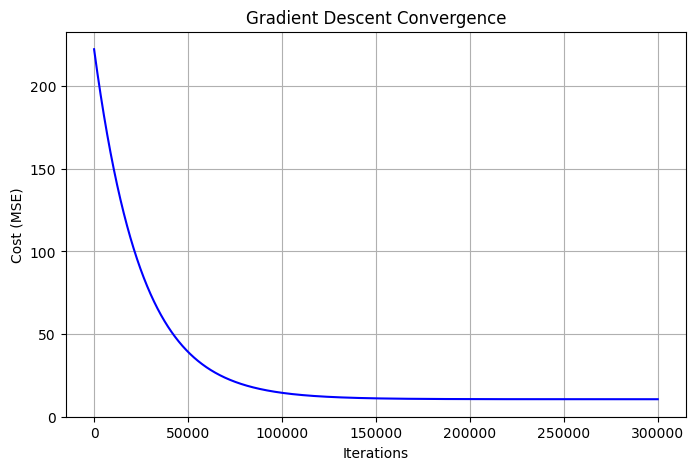

In [673]:
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()

- The results by using OLS and Gradient Descent are the same.